# Modelowanie statystyczne 
> WSB-NLU, 2024  
> Andrzej Kocielski  
____

## Zaimportowanie potrzebnych modułów

In [27]:
import os

# do obliczń numerycznych i analizy statystycznej
import numpy as np
import pandas as pd
import scipy.stats

# do wizualizacji danych
import matplotlib.pyplot as plt
import seaborn as sns

## Załadowanie danych surowych
Dane tygodniowe dla wybranych spółek oraz indeksów w okresie od 01.01.2023 do 15.12.2023. Źródło danych: [stooq.pl](https://stooq.pl/).

In [2]:
# Ścieżka do danych
directory_path = 'dane-finansowe'

# Lista plików csv
csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

print(f"Lista plików csv:")
for i, file in enumerate(csv_files):
    print(f"{i+1}. {file}") 

Lista plików csv:
1. comarch_w.csv
2. kghm_w.csv
3. eurpln_w.csv
4. spx_w.csv
5. echo_w.csv
6. xaupln_w.csv
7. apator_w.csv
8. wig_w.csv


In [3]:
# Przygotowanie danych roboczych

# Inicjalizaja pustego DataFrame
merged_df = pd.DataFrame()

# Zaczytanie danych z poszczególnych plików csv i dodanie do wspólnego DataFrame
for file in csv_files:
    file_path = os.path.join(directory_path, file)
    df = pd.read_csv(file_path)

    # Dodanie nazwy poliku do nazwy kolumny (poza pierwszą, czyli datą)
    nazwa_pliku = os.path.splitext(os.path.basename(file))[0][:-2].upper()
    df.columns = [df.columns[0]] + [f"{col}_{nazwa_pliku}" for col in df.columns[1:]]
    
    # Łączenie danych z poszczególnych plików 
    merged_df = pd.concat([merged_df, df], ignore_index=False, axis=1)

# Usunięcie powtórzonych kolumn z datami
merged_df = merged_df.T.drop_duplicates().T


In [4]:
# Zmiana typu danych 
cols = list(merged_df.columns)
cols.remove('Data')
for col in cols:
    merged_df[col] = merged_df[col].astype(float)

merged_df['Data'] = pd.to_datetime(merged_df['Data'])

In [5]:
print(f"Liczba wierszy: {merged_df.shape[0]}, liczba kolumn: {merged_df.shape[1]}")

Liczba wierszy: 1094, liczba kolumn: 39


In [6]:
print(f"Podgląd kilku pierwszych wierszy:")
merged_df.head()

Podgląd kilku pierwszych wierszy:


,Data,Otwarcie_COMARCH,Najwyzszy_COMARCH,Najnizszy_COMARCH,Zamkniecie_COMARCH,Wolumen_COMARCH,Otwarcie_KGHM,Najwyzszy_KGHM,Najnizszy_KGHM,Zamkniecie_KGHM,...,Otwarcie_APATOR,Najwyzszy_APATOR,Najnizszy_APATOR,Zamkniecie_APATOR,Wolumen_APATOR,Otwarcie_WIG,Najwyzszy_WIG,Najnizszy_WIG,Zamkniecie_WIG,Wolumen_WIG
0,2003-01-05,28.299032,28.601199,25.000256,27.099806,431401.754479,13.652976,14.044820,13.301183,13.896453,...,18.010886,18.134605,17.537700,18.134605,6271.654193,14397.8,14795.0,14210.2,14770.5,22771651.0
1,2003-01-12,27.500597,28.800545,27.402089,27.801831,177222.356697,14.003914,14.301871,13.652976,14.098994,...,18.010886,18.967117,17.895054,18.851244,16115.658748,14843.8,14917.6,14569.3,14785.9,32651395.0
2,2003-01-19,27.998963,30.998602,26.998967,27.402089,209181.152794,14.248278,14.450818,13.855517,13.949740,...,18.609742,20.640152,18.609742,19.919384,45891.730226,14865.7,15168.0,14578.9,14637.5,31098246.0
3,2003-01-26,27.299035,28.500476,26.900343,27.099806,74449.211625,14.003914,14.544705,13.855517,13.855517,...,19.090816,20.282675,19.090816,20.158935,11392.844721,14594.1,14654.0,14130.4,14133.8,26306693.0
4,2003-02-02,26.499668,27.299035,25.701116,27.299035,99876.091811,13.599414,13.693637,12.950551,13.599414,...,20.041029,20.993460,18.967117,20.757647,12638.751694,13930.1,13984.9,13623.7,13844.8,24134712.0


In [7]:
# sprawdzamy brakujące dane (ich liczbę) w poszczególnych kolumnach 
merged_df.isnull().sum() 

Data                  0
Otwarcie_COMARCH      0
Najwyzszy_COMARCH     0
Najnizszy_COMARCH     0
Zamkniecie_COMARCH    0
Wolumen_COMARCH       0
Otwarcie_KGHM         0
Najwyzszy_KGHM        0
Najnizszy_KGHM        0
Zamkniecie_KGHM       0
Wolumen_KGHM          0
Otwarcie_EURPLN       0
Najwyzszy_EURPLN      0
Najnizszy_EURPLN      0
Zamkniecie_EURPLN     0
Otwarcie_SPX          0
Najwyzszy_SPX         0
Najnizszy_SPX         0
Zamkniecie_SPX        0
Wolumen_SPX           0
Otwarcie_ECHO         0
Najwyzszy_ECHO        0
Najnizszy_ECHO        0
Zamkniecie_ECHO       0
Wolumen_ECHO          0
Otwarcie_XAUPLN       0
Najwyzszy_XAUPLN      0
Najnizszy_XAUPLN      0
Zamkniecie_XAUPLN     0
Otwarcie_APATOR       0
Najwyzszy_APATOR      0
Najnizszy_APATOR      0
Zamkniecie_APATOR     0
Wolumen_APATOR        0
Otwarcie_WIG          0
Najwyzszy_WIG         0
Najnizszy_WIG         0
Zamkniecie_WIG        0
Wolumen_WIG           0
dtype: int64

___
## Statystyka opisowa
### Dla spółki Comarch

In [24]:
comarch_cols = ["Otwarcie_COMARCH", "Otwarcie_COMARCH", "Najwyzszy_COMARCH", "Najnizszy_COMARCH", "Zamkniecie_COMARCH", "Wolumen_COMARCH"]
merged_df[comarch_cols].describe()

,Otwarcie_COMARCH,Otwarcie_COMARCH,Najwyzszy_COMARCH,Najnizszy_COMARCH,Zamkniecie_COMARCH,Wolumen_COMARCH
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000
mean,124.925244,124.925244,128.679422,120.492354,124.790129,31502.620402
std,59.345193,59.345193,61.028962,57.150349,59.133890,43057.032134
min,26.499668,26.499668,27.299035,25.000256,26.998967,414.209002
25%,69.999972,69.999972,71.962575,68.000212,69.999972,8167.880040
50%,116.958847,116.958847,119.996195,112.853738,117.210668,16970.808795
75%,176.000308,176.000308,179.995970,169.147666,175.999543,36870.601798
max,274.999921,274.999921,279.999537,260.000021,272.999654,431401.754479


In [25]:
# własna funkcja do obliczania inter quartile range (IQR)
def q25(column):
    return column.quantile(0.25)

def q75(column):
    return column.quantile(0.75)
    
def IQR(column): 
    q25, q75 = column.quantile([0.25, 0.75])
    return q75-q25

# własna funkcja do obliczania zakresu
def range_max_min(column):
    return column.max() - column.min()

charakterystyka = ["min", q25, "mean", "median", q75, IQR, range_max_min, "var", "std", "skew", "kurtosis"]

In [26]:
merged_df[comarch_cols].agg(charakterystyka)

,Otwarcie_COMARCH,Otwarcie_COMARCH,Najwyzszy_COMARCH,Najnizszy_COMARCH,Zamkniecie_COMARCH,Wolumen_COMARCH
min,26.499668,26.499668,27.299035,25.000256,26.998967,4.142090e+02
q25,69.999972,69.999972,71.962575,68.000212,69.999972,8.167880e+03
mean,124.925244,124.925244,128.679422,120.492354,124.790129,3.150262e+04
median,116.958847,116.958847,119.996195,112.853738,117.210668,1.697081e+04
q75,176.000308,176.000308,179.995970,169.147666,175.999543,3.687060e+04
IQR,106.000336,106.000336,108.033395,101.147453,105.999572,2.870272e+04
range_max_min,248.500253,248.500253,252.700501,234.999765,246.000687,4.309875e+05
var,3521.851876,3521.851876,3724.534171,3266.162422,3496.816984,1.853908e+09
std,59.345193,59.345193,61.028962,57.150349,59.133890,4.305703e+04
skew,0.303446,0.303446,0.302856,0.296482,0.296543,3.967857e+00


## Analiza graficzna zbioru danych

In [81]:
# przygotowanie podzbioru - tylko zamknięcia sesji
zamkniecia = ['Data', 'Zamkniecie_COMARCH', 'Zamkniecie_KGHM', 'Zamkniecie_EURPLN', 'Zamkniecie_SPX', 'Zamkniecie_ECHO', 'Zamkniecie_XAUPLN', 'Zamkniecie_APATOR', 'Zamkniecie_WIG']
zamkniecia_df = merged_df[zamkniecia]

spolki = ['Data', 'Zamkniecie_COMARCH', 'Zamkniecie_KGHM', 'Zamkniecie_ECHO', 'Zamkniecie_APATOR']
spolki_df = merged_df[spolki]

# ustawienie daty jako indeksu
zamkniecia_df.set_index('Data', inplace=True)
spolki_df.set_index('Data', inplace=True)

In [49]:
# ustawienie stylu wykresów
plt.style.use('classic')
plt.style.use('dark_background')

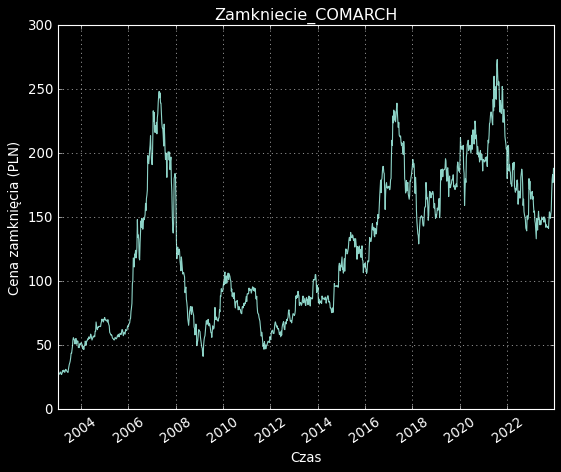

In [90]:
# wartość akcji w badanym okrecie
walor = zamkniecia_df.columns[0]

plt.plot(zamkniecia_df[walor]) 
plt.xlabel('Czas')
plt.ylabel('Cena zamknięcia (PLN)')
plt.title(f'{walor}')
plt.xticks(rotation=35)  
plt.grid(True,linestyle='dotted',) 
plt.show()

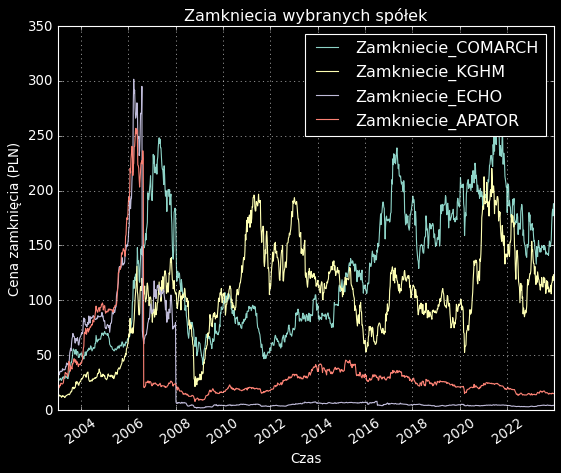

In [89]:
# wartość danego waloru w badanym okrecie

for walor in range(len(spolki_df.columns)):
    plt.plot(zamkniecia_df[spolki_df.columns[walor]], label=spolki_df.columns[walor]) 

plt.xlabel('Czas')
plt.ylabel('Cena zamknięcia (PLN)')
plt.title(f'Zamkniecia wybranych spółek')
plt.xticks(rotation=35)  
plt.grid(True,linestyle='dotted') 
plt.legend()
plt.show()

## Dodatkowe źródła
- [https://mateuszgrzyb.pl/3-metody-analizy-normalnosci-rozkladu-w-python/](https://mateuszgrzyb.pl/3-metody-analizy-normalnosci-rozkladu-w-python/)
- [https://github.com/bilalonur/financial-visualization/blob/main/finance-visualization.ipynb](https://github.com/bilalonur/financial-visualization/blob/main/finance-visualization.ipynb)
